<a href="https://colab.research.google.com/github/mathispuissant/StatApp/blob/main/Cluster_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from json import loads 
import seaborn as sns

import sys, os

# Disable
def blockPrint():
    sys.stdout = open(os.devnull, 'w')

# Restore
def enablePrint():
    sys.stdout = sys.__stdout__

In [4]:
%%time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from json import loads 
from google.colab import drive

CPU times: user 34 µs, sys: 9 µs, total: 43 µs
Wall time: 48.4 µs


In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

velib_nombre = pd.read_csv(r"/content/gdrive/My Drive/velib_sec.csv", sep =",")
velib_nombre = velib_nombre.set_index("station_id")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
velib_nombre.head()

,10/19/20;18:01:51,10/19/20;18:06:52,10/19/20;18:11:52,10/19/20;18:16:52,10/19/20;18:21:52,10/19/20;18:26:53,10/19/20;18:31:53,10/19/20;18:36:53,10/19/20;18:41:54,10/19/20;18:46:54,10/19/20;18:51:54,10/19/20;18:56:54,10/19/20;19:01:55,10/19/20;19:06:55,10/19/20;19:11:55,10/19/20;19:16:56,10/19/20;19:21:56,10/19/20;19:26:56,10/19/20;19:31:57,10/19/20;19:36:57,10/19/20;19:41:57,10/19/20;19:46:57,10/19/20;19:51:58,10/19/20;19:56:58,10/19/20;20:01:58,10/19/20;20:06:59,10/19/20;20:11:59,10/19/20;20:16:59,10/19/20;20:22:00,10/19/20;20:27:00,10/19/20;20:32:00,10/19/20;20:37:00,10/19/20;20:42:01,10/19/20;20:47:01,10/19/20;20:52:01,10/19/20;20:57:02,10/19/20;21:02:02,10/19/20;21:07:02,10/19/20;21:12:03,10/19/20;21:17:03,...,02/15/21;18:31:24,02/15/21;18:36:25,02/15/21;18:41:25,02/15/21;18:46:25,02/15/21;18:56:37,02/15/21;19:01:37,02/15/21;19:06:37,02/15/21;19:11:38,02/15/21;19:16:38,02/15/21;19:21:39,02/15/21;19:26:39,02/15/21;19:31:40,02/15/21;19:36:40,02/15/21;19:41:40,02/15/21;19:46:41,02/15/21;19:51:41,02/15/21;20:00:05,02/15/21;20:05:05,02/15/21;20:10:06,02/15/21;20:15:06,02/15/21;20:20:06,02/15/21;20:25:07,02/15/21;20:30:07,02/15/21;20:35:07,02/15/21;20:40:08,02/15/21;20:45:08,02/15/21;20:50:08,02/15/21;20:55:09,02/15/21;21:03:34,02/15/21;21:08:34,02/15/21;21:13:34,02/15/21;21:18:35,02/15/21;21:23:35,02/15/21;21:28:35,02/15/21;21:33:36,02/15/21;21:38:36,02/15/21;21:43:36,02/15/21;21:48:36,02/15/21;21:53:37,02/15/21;21:58:37
station_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
213688169,2,2,2,3,3,3,1,1,1,2,2,1,2,2,2,3,4,4,5,5,6,6,3,2,3,3,3,2,2,3,3,2,3,4,4,5,5,5,5,4,...,3,3,4,4,4,6,6,5,5,5,5,5,5,4,4,4,4,5,5,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5
99950133,46,46,47,49,46,44,43,43,45,43,43,45,47,45,46,48,48,49,47,47,48,49,49,48,48,47,51,52,51,49,49,49,50,51,50,49,49,50,50,50,...,31,31,29,29,28,28,28,27,25,26,25,25,24,24,24,24,23,23,24,24,24,24,24,26,25,25,24,26,25,25,24,24,24,24,24,24,24,24,24,24
516709288,1,1,1,2,2,2,3,1,1,1,1,2,2,2,2,2,0,1,1,2,3,3,3,3,3,4,5,4,5,7,9,9,9,10,10,10,11,11,11,11,...,5,5,6,4,5,5,5,5,4,4,4,5,5,5,5,6,6,6,5,5,5,5,5,5,4,4,4,4,4,3,3,3,3,3,3,3,3,5,4,4
36255,0,0,0,0,2,4,4,4,4,4,3,6,7,9,7,6,7,8,5,8,9,6,8,9,10,10,11,11,12,12,14,14,13,13,11,10,11,11,12,14,...,3,3,3,3,6,6,4,6,4,4,4,4,4,4,4,5,4,4,4,4,5,7,7,7,8,8,8,8,8,8,8,8,8,8,9,9,10,10,9,9
37815204,5,4,2,2,3,4,5,2,2,4,5,7,8,11,12,14,13,13,12,14,14,14,15,16,17,18,20,20,21,24,27,29,29,29,29,25,25,25,25,25,...,7,7,7,9,10,10,10,10,11,12,12,13,13,13,13,15,14,16,16,16,17,16,17,17,17,17,17,17,18,18,18,18,18,19,19,19,19,20,21,21


In [10]:
velib_nombre=velib_nombre.dropna(axis=0)
velib = velib_nombre.transpose()

In [13]:
X = [ pd.to_datetime(date, format = r"%m/%d/%y;%H:%M:%S") for date in velib_nombre.columns]
Y = [list(velib[station]) for station in velib.columns]


In [14]:
def mean_by_days(X, Y):
    x = []
    y = []


    if not len(X) == len(Y):
        return False


    old_day = [X[0].day, X[0].month, X[0].year]
    mean = 0
    iteration = 0

    for i in range(len(X)):
        day = [X[i].day, X[i].month, X[i].year]

        if  day == old_day:
            mean += Y[i]
            iteration += 1

        else :

            try:
                y.append(mean / iteration)
            except:
                y.append(0)

            x.append(str(old_day[0]) + "/" + str(old_day[1]))
            
            old_day = day
            mean = 0
            iteration = 0

    return x, y


In [21]:
x, y = mean_by_days(X, Y[0])


In [ ]:
def average_day_by_hours (X, Y):
    x = []
    y = []
    
    if not len(X) == len(Y):
        return False

    hours = {}

    for i in range(24):
        hours[i] = []

    for i in range(len(X)):
        hours[X[i].hour].append(Y[i])

    for i in range(24):
        y.append(
            sum(hours[i]) / len(hours[i])
        )
        x.append(i)

    return x, y

In [23]:
import statistics 

In [24]:
def week_days_and_weekend_days(X, Y):
    x = []
    y_weekend = []
    y_week = []

    if not len(X) == len(Y):
        return False

    hours = {"weekend": {}, "weekday": {}}

    for i in range(24):
        hours["weekend"][i] = []
        hours["weekday"][i] = []

    for i in range(len(X)):

        if X[i].weekday() < 5:
            hours["weekday"][X[i].hour].append(Y[i])
        if not X[i].weekday() < 5:
            hours["weekend"][X[i].hour].append(Y[i])


    for i in range(24):
        y_week.append(
np.array(hours["weekday"][i])
        )
        y_weekend.append(
np.array(hours["weekend"][i])
        )
        x.append(i)


    return x, y_week, y_weekend

In [ ]:
x, y_week, y_weekend = week_days_and_weekend_days(X, Y_m)
y_week_mean, y_week_q1, y_week_q3 = [], [], []
y_weekend_mean, y_weekend_q1, y_weekend_q3 = [], [], []


for i in range(len(y_week)):
    y_week_mean.append(np.mean(y_week[i]))
    y_week_q1.append(np.percentile(y_week[i], 25))
    y_week_q3.append(np.percentile(y_week[i], 75))

for i in range(len(y_weekend)):
    y_weekend_mean.append(np.mean(y_weekend[i]))
    y_weekend_q1.append(np.percentile(y_weekend[i], 25))
    y_weekend_q3.append(np.percentile(y_weekend[i], 75))


In [25]:
x, y_week, y_weekend = week_days_and_weekend_days(X, Y[0])


# Kmean with a normalized and mean centered data

In [39]:
Y = []
X = [ pd.to_datetime(date, format = r"%m/%d/%y;%H:%M:%S") for date in velib_nombre.columns]
list_velib_wo_bike = []

for i,k in enumerate(velib.columns):


    if i % 200 == 0:
        print(int(100 * i / len(velib.columns)))



    y_week_mean = []
    y_weekend_mean = []
    y = list(velib[k]) 

    x, y_week, y_weekend = week_days_and_weekend_days(X, y)

    

    for j in range(len(y_week)):     
        y_week_mean.append(np.mean(y_week[j]))
        y_weekend_mean.append(np.mean(y_weekend[j]))

    # normalizing and mean centering
    y_week_mean -= np.mean(y_week_mean)
    y_weekend_mean -= np.mean(y_weekend_mean)

    if np.max(np.abs(y_week_mean)) == 0:
        list_velib_wo_bike.append(k)

    else:
        Y.append(np.transpose(np.array([
            y_week_mean / np.max(np.abs(y_week_mean)),
            y_weekend_mean / np.max(np.abs(y_weekend_mean))
        ])))

Y = np.array(Y)

0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide


14
28
42
57
71
85


In [40]:
list_velib_wo_bike

[2254322638,
 213936755,
 2515618216,
 54000614,
 1057319366,
 1057383154,
 653085678,
 1063971944,
 1074347188,
 1074352578,
 6297,
 653159330,
 1057387136,
 213699079,
 54000623]

## cluster en folie

In [41]:
nb_clusters= [1,4]

In [ ]:
!pip install tslearn
from tslearn.clustering import TimeSeriesKMeans

clusters_Kmeans = {}
for i in range(*nb_clusters):
    clusters_Kmeans[i] = []
    clusters_Kmeans[i].append(TimeSeriesKMeans(n_clusters= i, metric="dtw", max_iter=20, n_init= 10))
    clusters_Kmeans[i].append(clusters_Kmeans[i][0].fit_predict(Y))
    print(i)


     |████████████████████████████████| 798kB 4.9MB/s 


/usr/local/lib/python3.7/dist-packages/tslearn/clustering/kmeans.py:17: UserWarning: Scikit-learn <0.24 will be deprecated in a future release of tslearn
  "Scikit-learn <0.24 will be deprecated in a "


In [ ]:
list_inertia.append(clusters_Kmeans[i][0].inertia_)

### création médianes

In [ ]:
for i in range(*nb_clusters):

    clusters_Kmeans[i].append({})
    for j in range(i):
            clusters_Kmeans[i][2][j] = []

    for index in range(len(clusters_Kmeans[i][1])):
        num_cluster = clusters_Kmeans[i][1][index]    
        clusters_Kmeans[i][2][num_cluster].append(Y[index])

    for j in range(i):
        q1_week = []
        q1_weekend = []
        q3_week = []
        q3_weekend = []
        for hour in range(24):
            q1_week.append(np.percentile([vect[hour][0] for vect in clusters_Kmeans[i][2][j]], 25))
            q1_weekend.append(np.percentile([vect[hour][1] for vect in clusters_Kmeans[i][2][j]], 25))
            q3_week.append(np.percentile([vect[hour][0] for vect in clusters_Kmeans[i][2][j]], 75))
            q3_weekend.append(np.percentile([vect[hour][1] for vect in clusters_Kmeans[i][2][j]], 75))
        clusters_Kmeans[i].append([q1_week,
        q1_weekend,
        q3_week,
        q3_weekend])


In [ ]:
for j in range(*nb_clusters):
    clusters = {}
    for i in range(len(clusters_Kmeans[j][0].cluster_centers_)):
        clusters[i] = [
            [times[0] for times in clusters_Kmeans[j][0].cluster_centers_ [i]],
            [times[1] for times in clusters_Kmeans[j][0].cluster_centers_ [i]]
        ]

    fig, axs = plt.subplots(len(clusters_Kmeans[j][0].cluster_centers_), 1, figsize=(10, 5 * j) )
    x = [i for i in range(24)]


    for i in range(len(clusters_Kmeans[j][0].cluster_centers_)):  
        axs[i].plot(x, clusters[i][0], label = "week")
        axs[i].plot(x, clusters[i][1], label = "weekend")

        axs[i].legend()
        axs[i].set_title("cluster " + str(i))
        axs[i].set_ylabel("taux d'occupation")
        axs[i].set_xlabel("heure")

    fig.savefig("results/Kmeans " + str(j) + " clusters" ".jpg")

In [ ]:
list_inertia = []
for j in range(*nb_clusters):
    list_inertia.append(clusters_Kmeans[j][0].inertia_)

In [ ]:
list_inertia

[7.608265947929566,
 5.393362054423828,
 4.503982596865056,
 4.123824789662627,
 3.867275663668193,
 3.681792106325219,
 3.491649914116708]

In [ ]:
x = [1, 2, 3, 4, 5, 6, 7]

Text(0, 0.5, 'inertie')

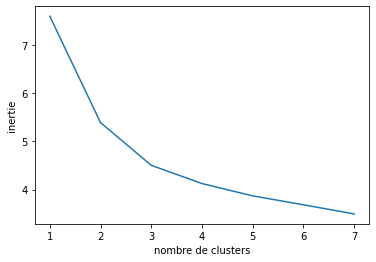

In [ ]:
plt.plot(x, list_inertia)
plt.xlabel("nombre de clusters")
plt.ylabel("inertie")